## Classification

**Learning outcomes:**
- Learn the difference between classification and regression. Be able to differentiate between classification and regression problems 
- Learn and apply basic models for classification using sklearn and keras.
Learn techniques to achieve better classification result


We have learnt about regression previously. Now, let's take a look at classificaiton. Fundamentally, classification is about predicting a label and regression is about predicting a quantity.

Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.

For example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“. A classification can have real-valued or discrete input variables.

Here are different types of classification problem: 
- A problem with two classes is often called a two-class or binary classification problem.
- A problem with more than two classes is often called a multi-class classification problem.
- A problem where an example is assigned multiple classes is called a multi-label classification problem.

It is common for classification models to predict a continuous value as the probability of a given example belonging to each output class. The probabilities can be interpreted as the likelihood or confidence of a given example belonging to each class. A predicted probability can be converted into a class value by selecting the class label that has the highest probability.

For example, a specific email of text may be assigned the probabilities of 0.1 as being “spam” and 0.9 as being “not spam”. We can convert these probabilities to a class label by selecting the “not spam” label as it has the highest predicted likelihood.

There are many ways to estimate the skill of a classification predictive model, but perhaps the most common is to calculate the classification accuracy.

The classification accuracy is the percentage of correctly classified examples out of all predictions made.

For example, if a classification predictive model made 5 predictions and 3 of them were correct and 2 of them were incorrect, then the classification accuracy of the model based on just these predictions would be:

```python 
accuracy = correct predictions / total predictions * 100
accuracy = 3 / 5 * 100
accuracy = 60%
``` 
An algorithm that is capable of learning a classification predictive model is called a classification algorithm.

<b>Dataset: "Alumni Giving Regression (Edited).csv" </b>

You can obtain the data set from this link https://www.dropbox.com/s/ggxo241uog06yhj/Diabetes%20%28Edited%29.csv?dl=0

Also, you may run the following code in order to download the dataset in `google colab`: 

```
!wget https://www.dropbox.com/s/ggxo241uog06yhj/Diabetes%20%28Edited%29.csv?dl=0 -O --quiet "Diabetes (Edited).csv"

```

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import pandas as pd
import csv

Firstly, we will work on preprocessing the data. For numerical data, often we would preprocess the data by scaling it. In our example, we apply standard scalar, a popular preprocessing technique.

Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one.

Standardization can drastically improve the performance of models. For instance, many elements used in the objective function of a learning algorithm assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

Here the code that does the scaling is as follows:

```python
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
```

Notice that we are using the scalar fitted on our `X_train` to transform values in X_test. This is to ensure that our model does not learn from the testing data. Usually, we would split our data before applying scaling. It is a bad practice to do scaling on the full data set.

Apart from standard scaling we can use other scalar such as `MinMaxScalar`. `feature_range` refers to the highest and lowest values after scaling. By default,
`feature_range' is -1 to 1. However, this range may proof to be too small as changes in our variable would be compressed to maximum of -1 to 1.

```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
```



In [10]:
Y_position = 8

# fix random seed for reproducibility
numpy.random.seed(7)

df = pd.read_csv('Diabetes (Edited).csv')
print(df)
# summary statistics
print(df.describe())

X = df.iloc[:,0:Y_position]
Y = df.iloc[:,Y_position]

# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=2020)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

      A    B   C   D    E     F      G   H  I
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]
                A           B           C           D           E           F  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000  

In order to reduce code duplication as seen in the chapter on `Regression`. We can abstract the model and create a function to help us train and predict. Here is the explaination for the code:

```python
model.fit(scaled_X_train, y_train)
```
We train the model using `scaled_X_train` and provide its label `y_train`

```python
y_predicted = model3.predict(scaled_X_test)
```
We predict the model on our testing data and store its result in the variable `y_predicted`

```python
cm_test = confusion_matrix(y_test,y_pred)
```
We create a confusion matrix given our y_test and y_pred. And what is a confusion matrix?

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

- Expected down the side: Each row of the matrix corresponds to a predicted class.
- Predicted across the top: Each column of the matrix corresponds to an actual class

```python 
 acc_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
 ```
Lastly, this code calculates the accuracy for us. Accuracy is the number of correctly predicted data points out of all the data points. More formally, it is defined as the number of true positives and true negatives divided by the number of true positives, true negatives, false positives, and false negatives. These values are the outputs of a confusion matrix. 

Here, we are assuming a binary classification problem. For multiclass classification problem, I would highly recommand using sklearn's `accuracy` function for its calculation.



In [11]:
def train_and_predict_using_model(model_name= "",model=None):
    model.fit(scaled_X_train, y_train)
    y_pred_train = model.predict(scaled_X_train)
    cm_train = confusion_matrix(y_train,y_pred_train)
    print(model_name)
    print("================================")
    print("Training confusion matrix: ")
    print(cm_train)
    acc_train = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
    print("TrainSet: Accurarcy %.2f%%" % (acc_train*100))
    print("================================")
    y_pred = model.predict(scaled_X_test)
    cm_test = confusion_matrix(y_test,y_pred)
    print(cm_test)
    acc_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
    print("Testset: Accurarcy %.2f%%" % (acc_test*100))
    print("================================")

### Logistic regression

<b> Why not use linear regression </b>

Suppose we have a data of tumor size vs its malignancy. As it is a classification problem, if we plot, we can see, all the values will lie on 0 and 1. And if we fit best found regression line, by assuming the threshold at 0.5, we can do line pretty reasonable job.

![Logistic regression](src/logistic1.png)

We can decide the point on the x axis from where all the values lie to its left side are considered as negative class and all the values lie to its right side are positive class.

![Logistic regression](src/logistic2.jpeg)

But what if there is an outlier in the data. Things would get pretty messy. For example, for 0.5 threshold,

![Logistic regression](src/logistic3.png)

If we fit best found regression line, it still won’t be enough to decide any point by which we can differentiate classes. It will put some positive class examples into negative class. The green dotted line (Decision Boundary) is dividing malignant tumors from benign tumors but the line should have been at a yellow line which is clearly dividing the positive and negative examples. So just a single outlier is disturbing the whole linear regression predictions. And that is where logistic regression comes into a picture.

As discussed earlier, to deal with outliers, Logistic Regression uses Sigmoid function.
An explanation of logistic regression can begin with an explanation of the standard logistic function. The logistic function is a Sigmoid function, which takes any real value between zero and one. It is defined as
Image for post

![Logistic regression](src/log_form.png)

And if we plot it, the graph will be S curve,

![Logistic regression](src/logistic4.png)

Now, when logistic regression model come across an outlier, it will take care of it.

![Logistic regression](src/logistic5.png)

<b> Another way of looking at logistic regression </b>

![Logistic regression](src/logistic1.png)

Consider the case where we are looking at a classification problem and our output is probability. Our output is from 0 to 1 which represents the probability that the event has occured. Using linear regression would result in output from 1 to infinity, which when mapped to a `sigmod` function goes very well into 0 to 1 depending on the output of linear regression. 

In [12]:

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")

Regression
[[274  31]
 [ 62  93]]
Regression TrainSet: Accurarcy 79.78%
[[172  23]
 [ 53  60]]
Regression Testset: Accurarcy 75.32%


Sample result:
```python
================================
[[274  31]
 [ 62  93]]
Regression TrainSet: Accurarcy 79.78%
================================
```
``` python
[[274  31]
 [ 62  93]]
```

Here is an example of a confusion matrix in python.

- 274 is when the Actual class is True and Predicted class is True.
- 31 is when the Actual class is True and Predicted class is False
- 62 is when the Actual class is False and Predicted class is True
- 93 is when the Actual class is False and Predicted class is False

**Improvement to our code**

Recall we have written a helper function to help us to capture the logic of training the model,prediciting the output and printing the train and test accurary as well as confusion matrix? Let put it to use here!

In [15]:
train_and_predict_using_model('Logistic Regression', linear_classifier)

Logistic Regression
Training confusion matrix: 
[[274  31]
 [ 62  93]]
TrainSet: Accurarcy 79.78%
[[172  23]
 [ 53  60]]
Testset: Accurarcy 75.32%


We have managed to reduce multiple lines of code to a succinct function call. This is a huge improvement in terms of code maintenance and code changes. If we need to change any of our code, we only have to apply it on our `train_and_predict_using_model` function.

### Decision Tree and Random Forest

The code and intuition behind Decision Tree and Random Forest is similar to that in regression. Thus, we will not be delving deeper into both models.

The code is as follows:


In [18]:

decision_tree_clf = tree.DecisionTreeClassifier()
train_and_predict_using_model('Decision Tree Classifier', linear_classifier)

print(
    '\n\n'
)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
train_and_predict_using_model('Random Forest Classifier', rf_clf)

Decision Tree Classifier
Training confusion matrix: 
[[274  31]
 [ 62  93]]
TrainSet: Accurarcy 79.78%
[[172  23]
 [ 53  60]]
Testset: Accurarcy 75.32%



Random Forest Classifier
Training confusion matrix: 
[[290  15]
 [ 96  59]]
TrainSet: Accurarcy 75.87%
[[184  11]
 [ 80  33]]
Testset: Accurarcy 70.45%


### Neural network

Lastly, we have neural network. Similar to logistic regression, we have to map our output from `-inf` to `inf` to `0` to `1`. Here, we will have to add a `Dense` layer with a `sigmoid` activation function. For multiclass, we should use a `softmax` activation function.

```python
model.add(Dense(1, activation='sigmoid'))
```
Here, we added a last layer mapping to a sigmoid function. Notice that we have 1 neuron in this layer as we would like to have 1 predicition. This might be different for multi-class and we should always check out the documentation.

```python
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
```
Also, we would need to tell the model that we need to use a different loss function. Here, for binary problem (Yes/No). `binary_crossentropy` is the way to go. For multiclass problem, we might need to use `categorical_crossentropy` as the loss function.


In [41]:

#Neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate
model = Sequential()
model.add(Dense(5, input_dim=Y_position, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
# https://www.tensorflow.org/guide/keras/train_and_evaluate
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

# Fit the model
model.fit(scaled_X_train, y_train, epochs=1, batch_size=20, verbose=0)

# evaluate the model
scores = model.evaluate(scaled_X_train, y_train)

print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(scaled_X_test)

y_pred = (predictions > 0.5)
y_pred = y_pred*1 #convert to 0,1 instead of True False
cm = confusion_matrix(y_test, y_pred)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc*100))


460/460 [==============================] - 0s 63us/step
Neural Network Trainset: 
accuracy: 71.09%
Neural Network on testset confusion matrix
[[177  18]
 [ 78  35]]
Neural Network on TestSet: Accuracy 68.83%


From above, notice that the training accuracy is at 71% which might be a case of underfitting. To improve our model, we can always increase the number of neurons / layer or increase the epoch for training.

In [42]:

#Neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate
model = Sequential()
model.add(Dense(10, input_dim=Y_position, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile model
# https://www.tensorflow.org/guide/keras/train_and_evaluate
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Fit the model
model.fit(scaled_X_train, y_train, epochs=200, batch_size=20, verbose=0)

# evaluate the model
scores = model.evaluate(scaled_X_train, y_train)

print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(scaled_X_test)

y_pred = (predictions > 0.5)
y_pred = y_pred*1 #convert to 0,1 instead of True False
cm = confusion_matrix(y_test, y_pred)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc*100))


460/460 [==============================] - 0s 126us/step
Neural Network Trainset: 
accuracy: 99.57%
Neural Network on testset confusion matrix
[[152  43]
 [ 43  70]]
Neural Network on TestSet: Accuracy 72.08%


Now, our accurary on training has reached 99%. However, accurary of test is still lower. This might be because of testing dataset differing from training dataset or overfitting. For overfitting, we will look at some regularization techniques. For now, adding `Dropout` layer and reducing training `epoch` would work just fine.  

### Logistic regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

```python
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

### Decision tree


- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
```

### Feature importance

In [ ]:
RF = model3
importances = RF.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature (Column index) 1 (0.307004)
2. feature (Column index) 7 (0.237150)
3. feature (Column index) 0 (0.129340)
4. feature (Column index) 5 (0.129255)
5. feature (Column index) 6 (0.069927)
6. feature (Column index) 4 (0.055137)
7. feature (Column index) 2 (0.044458)
8. feature (Column index) 3 (0.027729)


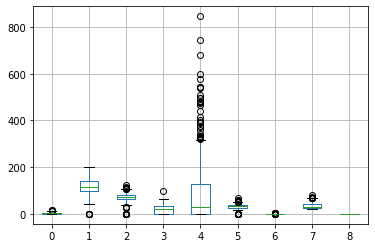

In [ ]:
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(dataset).boxplot()

### Remove outlier

In [ ]:
df = pd.DataFrame(dataset)
quantile = df[4].quantile(0.99)
df1 = df[df[4] < quantile]
df.shape, df1.shape

((768, 9), (760, 9))

In [ ]:
df1 = df1.dropna()

### Use top 3 features

In [ ]:
indices_top3 = indices[:3]
print(indices_top3)

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("Diabetes (Edited).csv", delimiter=",")

df = pd.DataFrame(dataset)

Y_position = 8
TOP_N_FEATURE = 3

X = dataset[:,indices_top3]
Y = dataset[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)


#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")


#Model 2: decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
y_pred_train2 = clf.predict(scaled_X_train)
cm2_train = confusion_matrix(y_train,y_pred_train2)
print("Decision Tree")
print("================================")
print(cm2_train)
acc_train2 = (cm2_train[0,0] + cm2_train[1,1]) / sum(sum(cm2_train))
print("Decsion Tree TrainSet: Accurarcy %.2f%%" % (acc_train2*100))
print("================================")
y_pred2 = clf.predict(scaled_X_test)
cm2 = confusion_matrix(y_test,y_pred2)
acc2 = (cm2[0,0] + cm2[1,1]) / sum(sum(cm2))
print(cm2)
print("Decision Tree Testset: Accurarcy %.2f%%" % (acc2*100))
print("================================")
print("================================")
print("================================")


#Model 3 random forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
#min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
#n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

model3 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model3.fit(scaled_X_train, y_train)
y_predicted3 = model3.predict(scaled_X_test)

y_pred_train3 = model3.predict(scaled_X_train)
cm3_train = confusion_matrix(y_train,y_pred_train3)
print("Random Forest")
print("================================")
print(cm3_train)
acc_train3 = (cm3_train[0,0] + cm3_train[1,1]) / sum(sum(cm3_train))
print("Random Forest TrainSet: Accurarcy %.2f%%" % (acc_train3*100))
print("================================")
y_pred3 = model3.predict(scaled_X_test)
cm_test3 = confusion_matrix(y_test,y_pred3)
print(cm_test3)
acc_test3 = (cm_test3[0,0] + cm_test3[1,1]) / sum(sum(cm_test3))
print("Random Forest Testset: Accurarcy %.2f%%" % (acc_test3*100))
print("================================")
print("================================")
print("================================")

#Model 4: XGBoost

print("Xgboost")
print("================================")
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, 
#subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, 
#n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

model4 = GradientBoostingClassifier(random_state=0)
model4.fit(scaled_X_train, y_train)
y_pred_train4 = model4.predict(scaled_X_train)
cm4_train = confusion_matrix(y_train,y_pred_train4)
print(cm4_train)
acc_train4 = (cm4_train[0,0] + cm4_train[1,1]) / sum(sum(cm4_train))
print("Xgboost TrainSet: Accurarcy %.2f%%" % (acc_train4*100))
predictions = model4.predict(scaled_X_test)
y_pred4 = (predictions > 0.5)
y_pred4 =y_pred4*1 #convert to 0,1 instead of True False
cm4 = confusion_matrix(y_test, y_pred4)
print("==================================")
print("Xgboost on testset confusion matrix")
print(cm4)
acc4 = (cm4[0,0] + cm4[1,1]) / sum(sum(cm4))
print("Xgboost on TestSet: Accuracy %.2f%%" % (acc4*100))
print("==================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate

model = Sequential()
model.add(Dense(10, input_dim=TOP_N_FEATURE, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)
# evaluate the model
scores = model.evaluate(X_train, y_train)
#print(scores)
print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions5 = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred5 = (predictions5 > 0.5)
y_pred5 = y_pred5*1 #convert to 0,1 instead of True False
cm5 = confusion_matrix(y_test, y_pred5)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm5)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc5 = (cm5[0,0] + cm5[1,1]) / sum(sum(cm5))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc5*100))

[1 7 0]
Regression
[[361  46]
 [105 102]]
Regression TrainSet: Accurarcy 75.41%
[[82 11]
 [30 31]]
Regression Testset: Accurarcy 73.38%
Decision Tree
[[407   0]
 [  0 207]]
Decsion Tree TrainSet: Accurarcy 100.00%
[[68 25]
 [32 29]]
Decision Tree Testset: Accurarcy 62.99%
Random Forest
[[377  30]
 [128  79]]
Random Forest TrainSet: Accurarcy 74.27%
[[87  6]
 [40 21]]
Random Forest Testset: Accurarcy 70.13%
Xgboost
[[389  18]
 [ 58 149]]
Xgboost TrainSet: Accurarcy 87.62%
Xgboost on testset confusion matrix
[[80 13]
 [29 32]]
Xgboost on TestSet: Accuracy 72.73%
20/20 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7671
Neural Network Trainset: 
accuracy: 76.71%
Neural Network on testset confusion matrix
[[81 12]
 [29 32]]
Neural Network on TestSet: Accuracy 73.38%


### SVM

In [15]:
from sklearn import svm

clf = svm.SVC()
train_and_predict_using_model("SVM (Classifier)", clf)

SVM (Classifier)
Training confusion matrix: 
[[361  46]
 [101 106]]
TrainSet: Accurarcy 76.06%
[[84  9]
 [31 30]]
Testset: Accurarcy 74.03%


#### Important hyper parameters:

For SVM here are some important paramteers to take note of: 

**Kernel**

Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Some of the possible paramters are as follow:
- rbf
- polynomial
- sigmoid

Here is an illustrated use of a rbf kernel

![](./regression/rbf.png)

Another important parameter would be class_weight. Here, it is mainly used for unbalanced dataset.

In [16]:
rbf_svc = svm.SVC(kernel='rbf')
train_and_predict_using_model("SVM (RBF kernel)", rbf_svc)

SVM (RBF kernel)
Training confusion matrix: 
[[361  46]
 [101 106]]
TrainSet: Accurarcy 76.06%
[[84  9]
 [31 30]]
Testset: Accurarcy 74.03%


In [19]:
rbf_svc = svm.SVC(kernel='poly')
train_and_predict_using_model("SVM (polynomial kernel)", rbf_svc)

SVM (polynomial kernel)
Training confusion matrix: 
[[393  14]
 [148  59]]
TrainSet: Accurarcy 73.62%
[[89  4]
 [47 14]]
Testset: Accurarcy 66.88%


In [20]:
rbf_svc = svm.SVC(kernel='sigmoid')
train_and_predict_using_model("SVM (sigmoid kernel)", rbf_svc)

SVM (sigmoid kernel)
Training confusion matrix: 
[[320  87]
 [112  95]]
TrainSet: Accurarcy 67.59%
[[68 25]
 [35 26]]
Testset: Accurarcy 61.04%


In [24]:
# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1:2})
train_and_predict_using_model('SVM uneven class weight', wclf)

SVM uneven class weight
Training confusion matrix: 
[[316  91]
 [ 75 132]]
TrainSet: Accurarcy 72.96%
[[71 22]
 [18 43]]
Testset: Accurarcy 74.03%


### Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability `P(c|x)` from `P(c)`, `P(x)` and `P(x|c)`

In [25]:
from sklearn.naive_bayes import GaussianNB

# maximum likelihood

gnb = GaussianNB()
train_and_predict_using_model("Naive Bayes", gnb)

Naive Bayes
Training confusion matrix: 
[[337  70]
 [ 93 114]]
TrainSet: Accurarcy 73.45%
[[78 15]
 [28 33]]
Testset: Accurarcy 72.08%


In [39]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

X, y = make_classification(n_samples=1000, weights=[0.1, 0.9])
# your GNB estimator
gnb = GaussianNB()
gnb.fit(X, y)

print("model prior {} close to your defined prior of {}".format(gnb.class_prior_, [0.1,0.9]))

model prior [0.105 0.895] close to your defined prior of [0.1, 0.9]


### Sample code

In [ ]:
import pandas as pd

df=pd.read_csv("C:/Users/User/Dropbox/TT Library/AI Model/Python/Treynor (Classification).csv")

print(df)

df=df.dropna()
print(df)

for i in df.columns:
    df=df[pd.to_numeric(df[i], errors='coerce').notnull()] #make it to null then remove null
print(df)

In [ ]:
import seaborn as sns

sns.barplot(x="Class", y="size_type", data=df)


In [ ]:
import matplotlib.pyplot as plt

df.hist()
plt.show()

In [ ]:

sns.barplot(x="Class", y= "Blend", data=df)

In [ ]:
import numpy as np
from scipy import stats

print(df)
z_scores = stats.zscore(df.astype(np.float))
print(z_scores)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
df = df[filtered_entries]

print(df)

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

In [ ]:
#Split X and Y

X=df.iloc[:,0:len(df.columns)-1]
print(X)
Y=df.iloc[:,len(df.columns)-1]
print(Y)

In [ ]:
dummy=pd.get_dummies(X["Blend"])
dummy.head()

In [ ]:
X=X.merge(dummy, left_index=True, right_index=True)
X.head()

In [ ]:
X=X.drop("Blend", axis="columns")
X.head()

In [ ]:
#Normalization

X["return_rating"]=stats.zscore(X["return_rating"].astype(np.float))

print(X)


In [ ]:
#split train test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
pred=model.predict(X_train)
cm=confusion_matrix(pred, Y_train)
print(cm)

In [ ]:
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

In [ ]:
pred=model.predict(X_test)
cm=confusion_matrix(pred, Y_test)
print(cm)

In [ ]:
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
pred=model.predict(X_train)
cm=confusion_matrix(pred, Y_train)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)


In [ ]:
pred=model.predict(X_test)
cm=confusion_matrix(pred, Y_test)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
Y_predict=model.predict(X_train)
cm=confusion_matrix(Y_train, Y_predict)
print(cm)

accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)
pred=model.predict(X_test)
cm=confusion_matrix(pred, Y_test)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_train)
cm=confusion_matrix(Y_train, pred)
print(cm)

accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)
pred=model.predict(X_test)
cm=confusion_matrix(Y_test, pred)
print(cm)

accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(10, input_dim=len(X_train.columns), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

score=model.evaluate(X_train, Y_train)
print(score[1])
score=model.evaluate(X_test, Y_test)
print(score[1])

pred=model.predict(X_train)
pred=np.where(pred>0.5,1,0)
cm=confusion_matrix(pred, Y_train)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

pred=model.predict(X_test)
pred=np.where(pred>0.5,1,0)
cm=confusion_matrix(pred, Y_test)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)